# Librerie sklearn per il pre-processing di dati

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

## Esempio

In [2]:
import matplotlib.pyplot as plt

In [63]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering

In [4]:
data_file = 'data/fifa/fifa_2019.csv'
D = pd.read_csv(data_file, index_col=0)

In [7]:
D[['Weight', 'Height']]

,Weight,Height
0,159lbs,5'7
1,183lbs,6'2
2,150lbs,5'9
3,168lbs,6'4
4,154lbs,5'11
...,...,...
18202,134lbs,5'9
18203,170lbs,6'3
18204,148lbs,5'8
18205,154lbs,5'10


In [13]:
w = [int(x.replace('lbs', '')) * 0.45359237 if not pd.isnull(x) else np.nan for x in D.Weight.values]
h = [float(x.replace("'", '.')) * 0.3048 if not pd.isnull(x) else np.nan for x in D.Height.values]
X = np.array([h, w]).T

In [18]:
null_indexes = []
for i, row in enumerate(X):
    if pd.isnull(row[0]) or pd.isnull(row[1]):
        null_indexes.append(i)

In [22]:
good_indexes = [x for x in range(X.shape[0]) if x not in null_indexes]

In [23]:
Xx = X[good_indexes]

In [24]:
Xx.shape

(18159, 2)

## Manage missing values
[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer), [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer), [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer, KNNImputer

In [26]:
examples = [i for i, x in enumerate(X[:,0]) if pd.isnull(x)]

In [27]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
itp = IterativeImputer()
itn = KNNImputer()
Xi = imp.fit_transform(X)
Xp = itp.fit_transform(X)
Xn = itn.fit_transform(X)

In [29]:
X[examples][:2]

array([[nan, nan],
       [nan, nan]])

In [28]:
Xi[examples][:2]

array([[ 1.76703751, 75.28686641],
       [ 1.76703751, 75.28686641]])

In [30]:
Xp[examples][:2]

array([[ 1.76703751, 75.28686641],
       [ 1.76703751, 75.28686641]])

In [31]:
Xn[examples][:2]

array([[ 1.76703751, 75.28686641],
       [ 1.76703751, 75.28686641]])

In [32]:
Xi

array([[ 1.73736   , 72.12118683],
       [ 1.88976   , 83.00740371],
       [ 1.79832   , 68.0388555 ],
       ...,
       [ 1.76784   , 67.13167076],
       [ 1.55448   , 69.85322498],
       [ 1.55448   , 79.83225712]])

In [64]:
aff = AgglomerativeClustering(n_clusters=4)
clusters = aff.fit_predict(Xi)

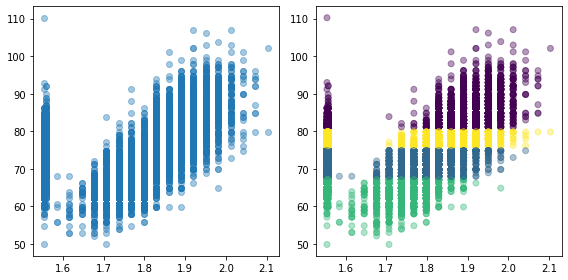

In [65]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)
ax[0].scatter(X[:,0], X[:,1], alpha=.4)
ax[1].scatter(X[:,0], X[:,1], alpha=.4, c=clusters)
plt.tight_layout()
plt.show()

## Scaling
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [66]:
from sklearn import preprocessing as pre

In [67]:
std = pre.StandardScaler().fit(Xi)
print(std.mean_, std.scale_)
Xistd = std.transform(Xi)
print(Xistd.mean(axis=0), Xistd.std(axis=0))

[ 1.76703751 75.28686641] [0.13643725 7.06349792]
[ 1.23321527e-16 -9.42863322e-16] [1. 1.]


In [68]:
Xistd[:2]

array([[-0.21751763, -0.44817449],
       [ 0.89947941,  1.09301898]])

In [69]:
aff = AgglomerativeClustering(n_clusters=4)
clusters = aff.fit_predict(Xistd)

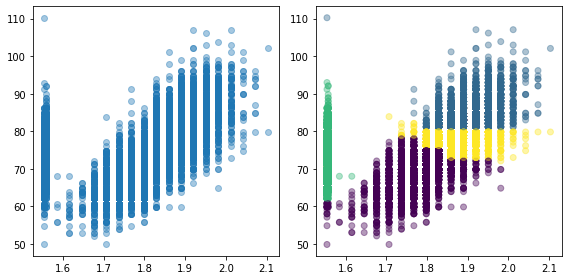

In [70]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)
ax[0].scatter(X[:,0], X[:,1], alpha=.4)
ax[1].scatter(X[:,0], X[:,1], alpha=.4, c=clusters)
plt.tight_layout()
plt.show()

### Altri metodi di scaling
[https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [44]:
from IPython.display import display

In [45]:
scalers = [pre.StandardScaler(), pre.MinMaxScaler(), pre.MaxAbsScaler(), pre.RobustScaler()]
for scaler in scalers:
    Xt = scaler.fit_transform(Xi)
    display(scaler.__class__.__name__)
    display(pd.DataFrame(Xt).describe().T)

'StandardScaler'

,count,mean,std,min,25%,50%,75%,max
0,18207.0,1.233215e-16,1.000027,-1.557914,-1.535574,0.229281,0.676080,2.463275
1,18207.0,-9.428633e-16,1.000027,-3.594778,-0.769256,-0.062876,0.643504,4.946003


'MinMaxScaler'

,count,mean,std,min,25%,50%,75%,max
0,18207.0,0.387426,0.248689,0.0,0.005556,0.444444,0.555556,1.0
1,18207.0,0.420896,0.117089,0.0,0.330827,0.413534,0.496241,1.0


'MaxAbsScaler'

,count,mean,std,min,25%,50%,75%,max
0,18207.0,0.840198,0.064876,0.739130,0.740580,0.855072,0.884058,1.0
1,18207.0,0.683042,0.064085,0.452675,0.633745,0.679012,0.724280,1.0


'RobustScaler'

,count,mean,std,min,25%,50%,75%,max
0,18207.0,-0.103670,0.452163,-0.808081,-0.79798,0.0,0.20202,1.010101
1,18207.0,0.044506,0.707853,-2.500000,-0.50000,0.0,0.50000,3.545455


### Pipeline

In [46]:
from sklearn.pipeline import Pipeline

In [56]:
pipe = Pipeline([('scaler', pre.MinMaxScaler()), ('kmeans', KMeans(n_clusters=4))])

In [57]:
Xi

array([[ 1.73736   , 72.12118683],
       [ 1.88976   , 83.00740371],
       [ 1.79832   , 68.0388555 ],
       ...,
       [ 1.76784   , 67.13167076],
       [ 1.55448   , 69.85322498],
       [ 1.55448   , 79.83225712]])

In [58]:
clusters = pipe.fit_predict(Xi)

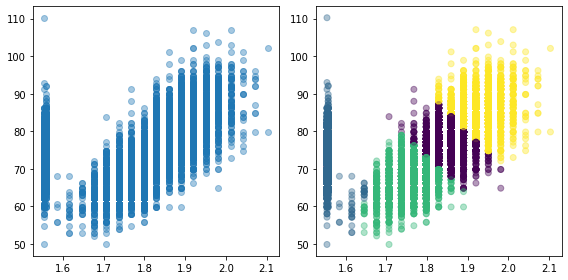

In [59]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)
ax[0].scatter(X[:,0], X[:,1], alpha=.4)
ax[1].scatter(X[:,0], X[:,1], alpha=.4, c=clusters)
plt.tight_layout()
plt.show()

## Trasformazioni non lineari

[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)


[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

In [71]:
np.percentile(Xi[:,0], [0, 25, 50, 75, 100])

array([1.55448 , 1.557528, 1.79832 , 1.85928 , 2.10312 ])

In [82]:
Xiq = pre.QuantileTransformer(output_distribution='uniform').fit_transform(Xi)
np.percentile(Xiq[:,0], [0, 25, 50, 75, 100])

array([0.        , 0.1956957 , 0.44894895, 0.72072072, 1.        ])

In [78]:
Xip = pre.PowerTransformer().fit_transform(Xi)

In [79]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, colors):
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax.scatter(x, y, alpha=0.4, c=colors)

    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [80]:
def make_plot(data, colors):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    scatter_hist(data[:,0], data[:,1], ax, ax_histx, ax_histy, colors)
    plt.show()

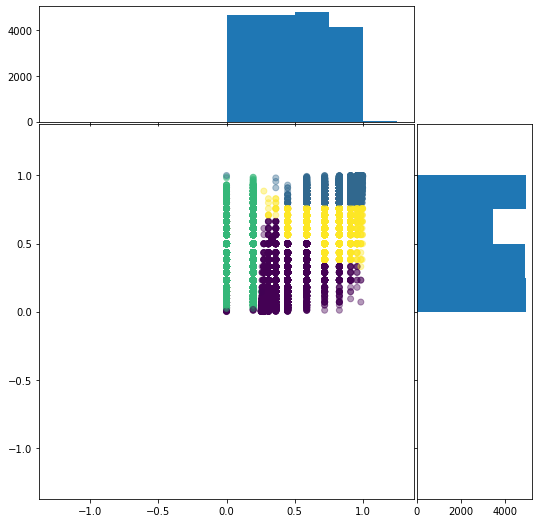

In [83]:
make_plot(Xiq, colors=clusters)

### Sommario
Si veda [https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

## Encoding categorical features

In [84]:
Y = D[['Age', 'Nationality', 'Overall', 'Club']].dropna().to_numpy()

In [85]:
Y

array([[31, 'Argentina', 94, 'FC Barcelona'],
       [33, 'Portugal', 94, 'Juventus'],
       [26, 'Brazil', 92, 'Paris Saint-Germain'],
       ...,
       [16, 'England', 47, 'Cambridge United'],
       [17, 'England', 47, 'Tranmere Rovers'],
       [16, 'England', 46, 'Tranmere Rovers']], dtype=object)

In [86]:
ordn = pre.OrdinalEncoder()
Yo = ordn.fit_transform(Y)

In [88]:
ordn.categories_

[array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45], dtype=object),
 array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium',
        'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia Herzegovina',
        'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep.', 'Chad',
        'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
        'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
        'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Ethiopia', 'FYR Macedonia', 'Faroe Islands', 'Fiji',
        'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
        'Ghana

In [87]:
Yo

array([[ 15.,   6.,  47., 212.],
       [ 17., 122.,  47., 326.],
       [ 10.,  20.,  46., 435.],
       ...,
       [  0.,  46.,   1., 122.],
       [  1.,  46.,   1., 586.],
       [  0.,  46.,   0., 586.]])

In [89]:
oneh = pre.OneHotEncoder()
Yh = oneh.fit_transform(Y)

In [90]:
oneh.categories_

[array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45], dtype=object),
 array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium',
        'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia Herzegovina',
        'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep.', 'Chad',
        'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
        'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
        'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Ethiopia', 'FYR Macedonia', 'Faroe Islands', 'Fiji',
        'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
        'Ghana

In [93]:
Yh

0.0

In [92]:
Yh.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Discretizzazione

In [103]:
est = pre.KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')

In [104]:
age = est.fit_transform(D.Age.values.reshape(-1, 1))

In [105]:
est.bin_edges_

array([array([16.        , 25.66666667, 35.33333333, 45.        ])],
      dtype=object)

In [107]:
age.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Trasformazioni personalizzate

In [110]:
transformer = pre.FunctionTransformer(np.log, validate=True)

In [111]:
transformer.transform(Xi)

array([[0.55236672, 4.27834785],
       [0.63644984, 4.41892981],
       [0.5868529 , 4.22007895],
       ...,
       [0.56975846, 4.20665593],
       [0.44114108, 4.24639625],
       [0.44114108, 4.37992765]])